## IMPORTS

In [1]:
# https://github.com/Madhu009/dataDL.ai/blob/master/MNIST-%20Exploration%20to%20Execution./MNIST_Complete_Analysis.ipynb
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNISTDataset

## DATALOADING

In [2]:
transform = torchvision.transforms.Compose([
torchvision.transforms.ToTensor()
])

train_ds = MNISTDataset(transform, train=True)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size = 32, shuffle=True)

In [3]:
Xb, yb = iter(train_dl).next()
print("\nData Shape: ", Xb.shape, yb.shape)


Data Shape:  torch.Size([32, 1, 28, 28]) torch.Size([32])


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\transforms\functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


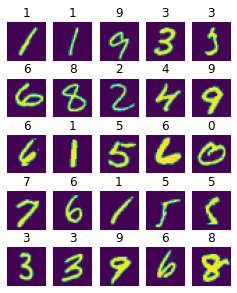

In [4]:
figure = plt.figure(figsize=(4,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.title(yb.numpy()[i])
    plt.imshow(Xb.numpy()[i].squeeze())

## MEAN CLASS IMAGE

In [5]:
explore_X, explore_y = [],[]
for i in range(len(train_dl)):
    X,y = iter(train_dl).next()
    explore_X.append(X.numpy())
    explore_y.append(y.numpy())

In [6]:
len(explore_X), len(explore_y)

(1875, 1875)

In [7]:
explore_X, explore_y = np.array(explore_X).reshape([60000,1,28,28]), np.array(explore_y).reshape([1875*32])
print(explore_X.shape, explore_y.shape)

(60000, 1, 28, 28) (60000,)


In [8]:
def get_class_arrays(class_index):
    return explore_X[explore_y==class_index],explore_y[explore_y==class_index]

def get_mean_images():
    for i in range(10):
        class_arrayX,class_arrayY = get_class_arrays(i)
        mean_image = class_arrayX.mean(axis=0)
        plt.subplot(2,5,i+1)
        plt.axis("off")
        plt.title(i)
        plt.imshow(mean_image.squeeze())

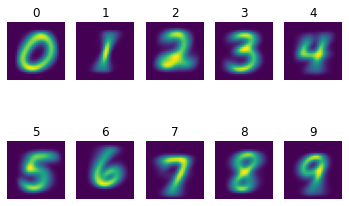

In [9]:
get_mean_images()

## CLASS PIXEL VALUE DISTRIBUTION

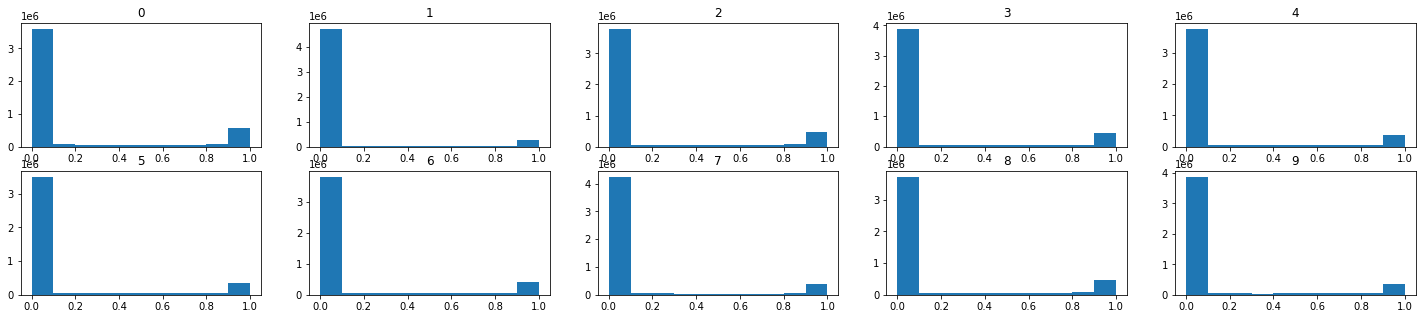

In [10]:
figure = plt.figure(figsize=(25,5))

def get_histogram():
    for i in range(10):
        class_arrayX,class_arrayY = get_class_arrays(i)
        plt.subplot(2,5,i+1)
        _ = plt.hist(class_arrayX.reshape(-1))
        plt.title(i)
get_histogram()

[0.17369504, 0.07628988, 0.14905453, 0.1414087, 0.12138561, 0.1285142, 0.13692735, 0.114433244, 0.15031207, 0.122800075]


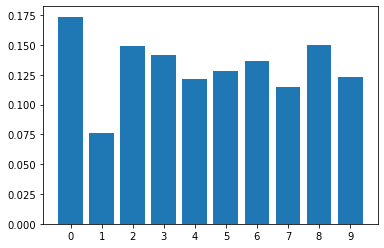

In [11]:
# MEAN VALUES FOR EACH CLASS
def get_mean_barchart():
    mean_values =[]
    for i in range(10):
        class_arrayX,class_arrayY = get_class_arrays(i)
        mean_values.append(class_arrayX.mean())
    
    plt.bar(np.arange(10),mean_values, align='center')
    plt.xticks(np.arange(10))
    print(mean_values)

get_mean_barchart()

## PCA

In [12]:
from sklearn.decomposition import PCA

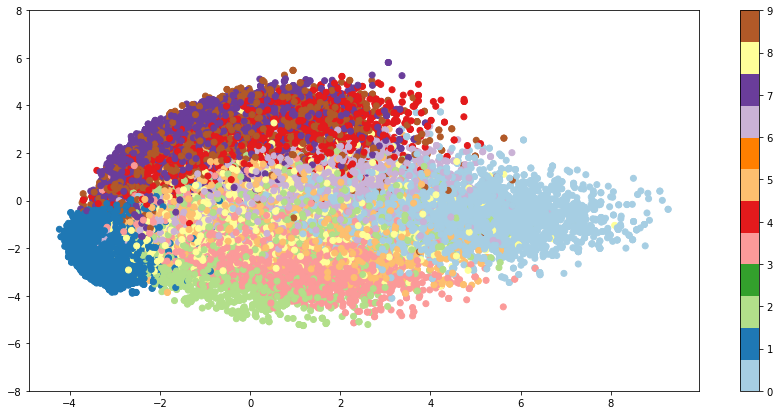

In [13]:


figure = plt.figure(figsize=(15,7))

pca = PCA(n_components=2)
proj = pca.fit_transform(explore_X.reshape(-1,784))
plt.scatter(proj[:, 0], proj[:, 1], c=explore_y, cmap="Paired")
plt.ylim([-8,8])
plt.colorbar(ticks=range(10))

## t-SNE

In [17]:
from MulticoreTSNE import MulticoreTSNE as TSNE
embeddings = TSNE(n_jobs=2).fit_transform(explore_X.reshape(-1,784))

ModuleNotFoundError: No module named 'MulticoreTSNE'

In [ ]:
figure = plt.figure(figsize=(15,7))

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=explore_y, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

In [ ]:
figure = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
_= plt.hist(explore_X.reshape(-1))
plt.title("Original 784-d data")
plt.subplot(1,2,2)
_= plt.hist(embeddings.reshape(-1))
plt.title("t-SNE 2-d data")
plt.show()

In [ ]:
def get_class_embeddings_arrays(class_index):
    return embeddings[explore_y==class_index],explore_y[explore_y==class_index]

In [ ]:
figure = plt.figure(figsize=(20,7))

for i in range(10):
    plt.subplot(2,5,i+1)
    class_embeddings_arrayX,class_embeddings_arrayY = get_class_embeddings_arrays(i)
    plt.scatter(class_embeddings_arrayX[:, 0], class_embeddings_arrayX[:, 1], c=class_embeddings_arrayY, 
                cmap=plt.cm.get_cmap("jet", 10), marker='.')
    plt.clim(-0.5, 9.5)
    plt.axis([-40, 40, -40, 40])
    plt.title(i)